# Distribuciones Estacionarias
![](https://i.pinimg.com/originals/4a/30/77/4a30772e96d7352a26414cd60de33655.gif)

Sabemos que cuando tenemos una cadena de Markov $\{X_n\}_{n \in \mathbb{N}}$ con espacio de estados $\mathcal{S}$, podemos pensar en la sucesión $\{\pi_n\}_{n \in \mathbb{N}}$, donde la distribución $\pi_j$ corresponde a la distribución de probabilidad de la variable aleatoria $X_j$ sobre su conjunto de estados.

En clase, se probó que

$$ \pi_{n+1} = \pi_n P $$

donde $P$ es la matriz de transición.

Veamos un ejemplo, si consideramos la cadena con matriz de transición

$$
P = \begin{bmatrix}
0 & 0 & 0.9 & 0.1 \\
0.1 & 0.05 & 0.8 & 0.05 \\
0.025 & 0.025 & 0.9 & 0.05 \\
0.1 & 0.1 & 0.7 & 0.1
\end{bmatrix}
$$

Entonces, ¿cómo se comportan a lo largo del tiempo sus distribuciones dada una distribución inicial?

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

P0 = np.array([
    [0, 0, 0.9, 0.1],
    [0.1, 0.05, 0.8, 0.05],
    [0.025, 0.025, 0.9, 0.05],
    [0.1, 0.1, 0.7, 0.1]
])

pi_0 = np.array([1,0,0,0]) # Suponemos esta dist inicial

N = 10
distribuciones = []

for n in range(N):
    pi_n = np.dot(pi_0, P0)
    distribuciones.append(pi_n)
    pi_0 = pi_n

distribuciones

[array([0. , 0. , 0.9, 0.1]),
 array([0.0325, 0.0325, 0.88  , 0.055 ]),
 array([0.03075 , 0.029125, 0.88575 , 0.054375]),
 array([0.03049375, 0.0290375 , 0.8862125 , 0.05425625]),
 array([0.03048469, 0.02903281, 0.886245  , 0.0542375 ]),
 array([0.03048316, 0.02903152, 0.88624922, 0.05423611]),
 array([0.03048299, 0.02903142, 0.88624963, 0.05423596]),
 array([0.03048298, 0.02903141, 0.88624967, 0.05423595]),
 array([0.03048298, 0.02903141, 0.88624967, 0.05423595]),
 array([0.03048298, 0.02903141, 0.88624967, 0.05423595])]

Acá como que se estaciona, ¿no?

¿Qué pasa si empieza con esa como mi distribución inicial?

In [ ]:
pi_00 = np.array([0.03048298, 0.02903141, 0.88624967, 0.05423595])
N = 10
distribuciones2 = []

for n in range(N):
    pi_n = np.dot(pi_00, P0)
    distribuciones2.append(pi_n)
    pi_00 = pi_n

distribuciones2

[array([0.03048298, 0.02903141, 0.88624968, 0.05423595]),
 array([0.03048298, 0.02903141, 0.88624968, 0.05423595]),
 array([0.03048298, 0.02903141, 0.88624968, 0.05423595]),
 array([0.03048298, 0.02903141, 0.88624968, 0.05423595]),
 array([0.03048298, 0.02903141, 0.88624968, 0.05423595]),
 array([0.03048298, 0.02903141, 0.88624968, 0.05423595]),
 array([0.03048298, 0.02903141, 0.88624968, 0.05423595]),
 array([0.03048298, 0.02903141, 0.88624968, 0.05423595]),
 array([0.03048298, 0.02903141, 0.88624968, 0.05423595]),
 array([0.03048298, 0.02903141, 0.88624968, 0.05423595])]

¿Qué pasa con las distribuciones en este caso? No cambian conforme pasa el tiempo, es decir que es **estacionaria** o **invariante** para la cadena de Markov.

A las distribuciones de probabilidad $\pi$ que cumplan esta propiedad se les llama distribuciones estacionarias. Nota que en particular deben cumplir que $\pi P = \pi$, lo cual es la definición.



Veamos otro ejemplo, si consideramos la cadena de Markov con matriz de transición

\begin{pmatrix}
\frac{2}{3} & \frac{1}{3} \\
\frac{1}{4} & \frac{3}{4}
\end{pmatrix}

entonces analicemos su comportamiento si tomamos como distribución inicial a $\pi_0 = (\frac{3}{7}, \frac{4}{7})$

In [ ]:
P = np.array([[2/3, 1/3], [1/4, 3/4]])
pi_0 = np.array([3/7, 4/7])
N = 10
distribuciones = []

for n in range(N):
    pi_n = np.dot(pi_0, P)
    distribuciones.append(pi_n)
    pi_0 = pi_n

distribuciones

[array([0.42857143, 0.57142857]),
 array([0.42857143, 0.57142857]),
 array([0.42857143, 0.57142857]),
 array([0.42857143, 0.57142857]),
 array([0.42857143, 0.57142857]),
 array([0.42857143, 0.57142857]),
 array([0.42857143, 0.57142857]),
 array([0.42857143, 0.57142857]),
 array([0.42857143, 0.57142857]),
 array([0.42857143, 0.57142857])]

¡Esta era la distribución estacionaria!

De hecho, en general, para la cadena de Markov de dos estados con matriz de transición dada por

\begin{pmatrix}
1-a & a \\
b & 1-b
\end{pmatrix}

la distribución $\pi = (\frac{a}{a+b} , \frac{b}{a+b})$ es estacionaria. Este es un caso particular donde $a = \frac{1}{3}$ y $b = \frac{1}{4}$

Ahora actualizaremos nuestra clase Cadena de Markov para incluir el cálculo de las distribuciones a largo plazo.

In [ ]:
class CadenaMarkov:

  # Definimos el constructor de la clase
  def __init__(self, P, pi_0):
    self.P = P
    self.pi_0 = pi_0
    self.estados = list(range(len(pi_0))) # Nuevo: Definimos el espacio de estados
    self.proceso = [np.random.choice(range(len(pi_0)), p = pi_0)]

  # Simulamos la cadena igual que antes
  def simular(self, iter):
    for i in range(iter):
      estado_actual = self.proceso[-1]
      xn = np.random.choice(range(len(self.pi_0)), p = self.P[estado_actual])
      self.proceso.append(int(xn))
    return self.proceso

  # Graficamos la trayectoria generada de nuestro proceso
  def plot(self, co):
    plt.figure(figsize=(7,4))
    plt.plot(self.proceso, '-', color = co, ms=1)
    plt.style.use('seaborn-v0_8-dark')
    plt.grid()
    plt.title('Cadena de Markov')
    plt.xlabel('Iteración')
    plt.ylabel('Estado')
    plt.show()

  # Función para calcular m_y, recibe iteraciones de cada trayectoria y número de trayectorias
  def Tiempos_retorno(self, y, iter, trayectorias):
    # Verificamos que el estado esté en el conjunto de estados
    if not y in self.estados:
      return None
    else:
      muestra = []
      # Generamos tantas trayectorias como indiquemos
      for _ in range(trayectorias):
        # Generamos una trayectoria que empiece en el estado que queremos
        cadena_y = CadenaMarkov(self.P, [1 if i == y else 0 for i in range(len(self.pi_0))])
        # Simulamos la trayectoria
        cadena_y.simular(iter)
        # Verificamos el tiempo de retorno de esa trayectoria y lo añadimos a la lista muestra
        for t in range(1, len(cadena_y.proceso)):
          if cadena_y.proceso[t] == y:
            muestra.append(t)
            break
      # Si todo sale bien, devolvemos la media muestral de la muestra de T_y
      if muestra:
        return sum(muestra) / len(muestra)
      else:
        return None

  def distribuciones(self, iter):
    # Definimos nuestra lista de distribuciones
    distribuciones = []
    pi_0 = self.pi_0
    # Iteramos como ya sabemos y guardamos las distribuciones
    for n in range(iter):
        pi_n = np.dot(pi_0, self.P)
        distribuciones.append(pi_n)
        pi_0 = pi_n
    return distribuciones



Para la cadena de la clase 4 con matriz de transición

\begin{pmatrix}
0 & 0.5 & 0.5 \\
0.25 & 0.5 & 0.25 \\
0.25 & 0.25 & 0.5
\end{pmatrix}

Calculamos que los tiempos medios de retorno del 0, 1 y 2 eran $5$, $\frac{5}{2}$ y $\frac{5}{2}$, respectivamente. Veamos ahora cómo es su evolución en distribuciones

In [ ]:
P1 = np.array([[0, 0.5, 0.5],
               [0.25, 0.5, 0.25],
               [.25, 0.25, 0.5]])

cadena_prueba = CadenaMarkov(P1, [1,0,0])
cadena_prueba.distribuciones(20)

[array([0. , 0.5, 0.5]),
 array([0.25 , 0.375, 0.375]),
 array([0.1875 , 0.40625, 0.40625]),
 array([0.203125 , 0.3984375, 0.3984375]),
 array([0.19921875, 0.40039062, 0.40039062]),
 array([0.20019531, 0.39990234, 0.39990234]),
 array([0.19995117, 0.40002441, 0.40002441]),
 array([0.20001221, 0.3999939 , 0.3999939 ]),
 array([0.19999695, 0.40000153, 0.40000153]),
 array([0.20000076, 0.39999962, 0.39999962]),
 array([0.19999981, 0.4000001 , 0.4000001 ]),
 array([0.20000005, 0.39999998, 0.39999998]),
 array([0.19999999, 0.40000001, 0.40000001]),
 array([0.2, 0.4, 0.4]),
 array([0.2, 0.4, 0.4]),
 array([0.2, 0.4, 0.4]),
 array([0.2, 0.4, 0.4]),
 array([0.2, 0.4, 0.4]),
 array([0.2, 0.4, 0.4]),
 array([0.2, 0.4, 0.4])]

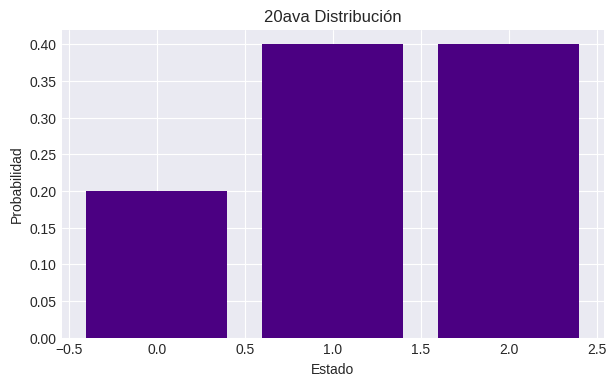

In [ ]:
plt.figure(figsize=(7,4))
plt.style.use('seaborn-v0_8-dark')
plt.bar([0,1,2], cadena_prueba.distribuciones(20)[-1], color = 'indigo')
plt.grid()
plt.title('20ava Distribución')
plt.xlabel('Estado')
plt.ylabel('Probabilidad')
plt.show()


Y sabemos que:

$$ \pi = (\frac{1}{5}, \frac{2}{5}, \frac{2}{5}) = (0.2, 0.4, 0.4) $$

Esto concuerda con que la distribución estacionaria es el recíproco del tiempo medio de retorno.

Con el ejemplo anterior, teníamos la cadena de Markov con matriz de transición

\begin{pmatrix}
\frac{2}{3} & \frac{1}{3} \\
\frac{1}{4} & \frac{3}{4}
\end{pmatrix}

vimos que $\pi_0 = (\frac{3}{7}, \frac{4}{7})$ es su distribución estacionaria. Veamos sus tiempos medios de retorno.

Recuerda que $\frac{7}{3} ≈ 2.3333$ y $\frac{7}{4} = 1.75$

In [ ]:
P = np.array([[2/3, 1/3], [1/4, 3/4]])
pi_0 = np.array([3/7, 4/7])

cadena_prueba2 = CadenaMarkov(P, pi_0)
print('El tiempo de retorno a 0 es:', cadena_prueba2.Tiempos_retorno(0, 1000, 1000), '\n a 1 es: ', cadena_prueba2.Tiempos_retorno(1, 1000, 1000))

El tiempo de retorno a 0 es: 2.407 
 a 1 es:  1.715


¡También concuerda con el resultado teórico!

**Ejemplo**
analicemos la cadena de Markov con matriz de transición

\begin{pmatrix}
1 & 0 & 0 \\
1/3 & 1/3 & 1/3 \\
0 & 0 & 1
\end{pmatrix}

cumple que $(\frac{1}{2}, 0, \frac{1}{2})$ es una distribución estacionaria:

In [ ]:
P2 = np.array([[1, 0, 0],
               [1/3, 1/3, 1/3],
               [0, 0, 1]])

picero = np.array([1/2, 0, 1/2])

cadena_prueba3 = CadenaMarkov(P2, picero)
cadena_prueba3.distribuciones(10)

[array([0.5, 0. , 0.5]),
 array([0.5, 0. , 0.5]),
 array([0.5, 0. , 0.5]),
 array([0.5, 0. , 0.5]),
 array([0.5, 0. , 0.5]),
 array([0.5, 0. , 0.5]),
 array([0.5, 0. , 0.5]),
 array([0.5, 0. , 0.5]),
 array([0.5, 0. , 0.5]),
 array([0.5, 0. , 0.5])]

Sin embargo, es fácil probar que si $\alpha \in [0,1]$, entonces $\pi_\alpha = (1-\alpha, 0, \alpha)$ es estacionaria para la cadena. Entonces este es un ejemplo con infinitas distribuciones estacionarias.

In [ ]:
cadena_prueba4 = CadenaMarkov(P2, [3/4, 0, 1/4])
cadena_prueba4.distribuciones(10)

[array([0.75, 0.  , 0.25]),
 array([0.75, 0.  , 0.25]),
 array([0.75, 0.  , 0.25]),
 array([0.75, 0.  , 0.25]),
 array([0.75, 0.  , 0.25]),
 array([0.75, 0.  , 0.25]),
 array([0.75, 0.  , 0.25]),
 array([0.75, 0.  , 0.25]),
 array([0.75, 0.  , 0.25]),
 array([0.75, 0.  , 0.25])]

Finalmente, actualizaremos el código usado de la clase CadenadeMarkov para incluir el cálculo de la distribución estacionaria dada una distribución inicial. Como ya calculamos el tiempo medio de retorno, esta será una aproximación sencilla.

In [7]:
class CadenaMarkov:

  # Definimos el constructor de la clase
  def __init__(self, P, pi_0):
    self.P = P
    self.pi_0 = pi_0
    self.estados = list(range(len(pi_0))) # Nuevo: Definimos el espacio de estados
    self.proceso = [np.random.choice(range(len(pi_0)), p = pi_0)]

  # Simulamos la cadena igual que antes
  def simular(self, iter):
    for i in range(iter):
      estado_actual = self.proceso[-1]
      xn = np.random.choice(range(len(self.pi_0)), p = self.P[estado_actual])
      self.proceso.append(int(xn))
    return self.proceso

  # Graficamos la trayectoria generada de nuestro proceso
  def plot(self, co):
    plt.figure(figsize=(7,4))
    plt.plot(self.proceso, '-', color = co, ms=1)
    plt.style.use('seaborn-v0_8-dark')
    plt.grid()
    plt.title('Cadena de Markov')
    plt.xlabel('Iteración')
    plt.ylabel('Estado')
    plt.show()

  # Función para calcular m_y, recibe iteraciones de cada trayectoria y número de trayectorias
  def Tiempos_retorno(self, y, iter, trayectorias):
    # Verificamos que el estado esté en el conjunto de estados
    if not y in self.estados:
      return None
    else:
      muestra = []
      # Generamos tantas trayectorias como indiquemos
      for _ in range(trayectorias):
        # Generamos una trayectoria que empiece en el estado que queremos
        cadena_y = CadenaMarkov(self.P, [1 if i == y else 0 for i in range(len(self.pi_0))])
        # Simulamos la trayectoria
        cadena_y.simular(iter)
        # Verificamos el tiempo de retorno de esa trayectoria y lo añadimos a la lista muestra
        for t in range(1, len(cadena_y.proceso)):
          if cadena_y.proceso[t] == y:
            muestra.append(t)
            break
      # Si todo sale bien, devolvemos la media muestral de la muestra de T_y
      if muestra:
        return sum(muestra) / len(muestra)
      else:
        return None

  def distribucion_estacionaria(self):
    cadena_estado = CadenaMarkov(self.P, self.pi_0)
    est = [1/cadena_estado.Tiempos_retorno(j, 1000, 1000) for j in self.estados]
    return est


Ahora probemos nuestro código con uno de los ejemplos anteriores.

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import random
P1 = np.array([[0, 0.5, 0.5],
               [0.25, 0.5, 0.25],
               [.25, 0.25, 0.5]])

cadena_prueba = CadenaMarkov(P1, [1,0,0])
cadena_prueba.distribucion_estacionaria()

[0.19421246844047388, 0.3963535473642489, 0.4081632653061224]

¡Nuestro código funciona!

**Ejercicio**

1. Con simulación, calcula la distribución estacionaria de una cadena de Markov de dos estados con $a,b \in (0,1)$ fijos.
2. Haz una función en Python que reciba como parámetros $a,b \in (0,1)$ y devuelva la distribución estacionaria de una cadena de Markov de dos estados.